In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_excel('Geomechanical_Properties_Prediction_DataSet.xlsx')
df

,Depth,Resistivity,Gamma Ray,Total Porosity,Effective Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
0,6805.0,57.47087,110.47838,0.03449,0.00445,2.76576,67.67523,124.05187
1,6805.5,58.85637,112.94601,0.03716,0.00775,2.76560,67.74464,123.80700
2,6806.0,65.01717,114.49005,0.03828,0.00976,2.75550,67.75224,123.40514
3,6806.5,63.35363,116.06593,0.03364,0.00568,2.74892,67.71935,123.23686
4,6807.0,62.28267,117.68179,0.03199,0.00340,2.75687,67.69218,123.43977
...,...,...,...,...,...,...,...,...
1899,7754.5,658.59399,52.87986,0.00709,0.00621,2.69998,52.17642,90.09988
1900,7755.0,2887.57812,41.62927,0.00400,0.00306,2.70699,51.94688,88.39143
1901,7755.5,5068.73682,36.78852,0.00287,0.00212,2.71437,51.45436,87.12267
1902,7756.0,1797.73010,34.76611,0.00591,0.00569,2.71223,50.93727,86.78609


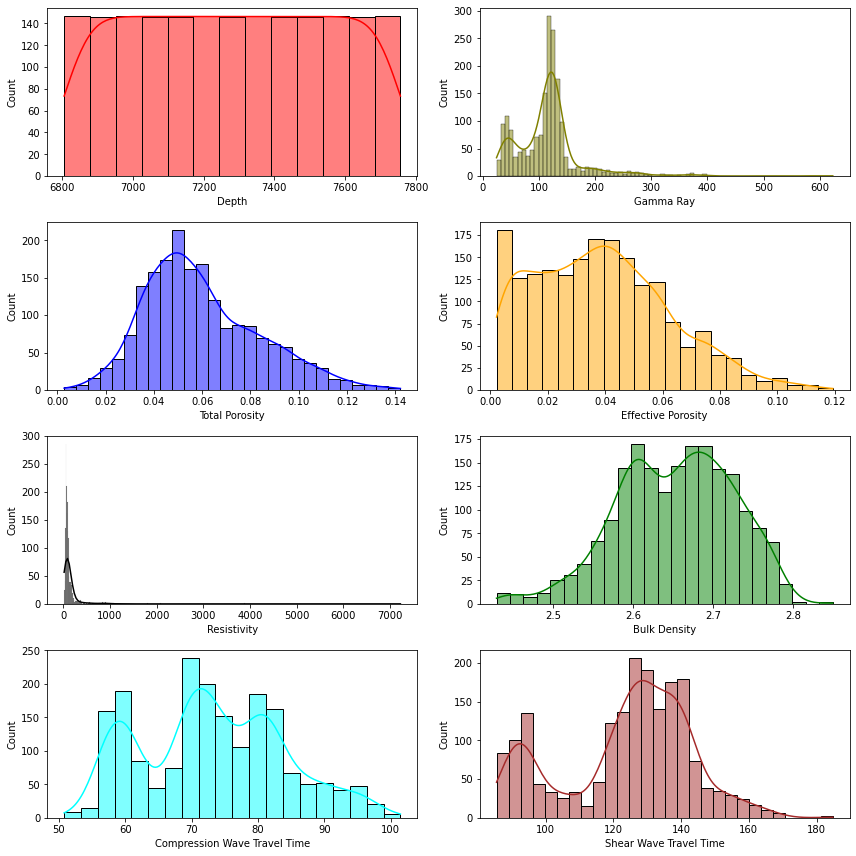

In [3]:

fig, ax = plt.subplots(4, 2, figsize=(12, 12))
sns.histplot(x=df['Depth'] , color="red", kde=True, ax=ax[0, 0])
sns.histplot(x=df['Gamma Ray'] , color="olive", kde=True, ax=ax[0, 1])
sns.histplot(x=df['Total Porosity'] , color="blue", kde=True,ax=ax[1, 0])
sns.histplot(x=df['Effective Porosity'] , color="orange", kde=True, ax=ax[1, 1])
sns.histplot(x=df['Resistivity'] , color="black", kde=True, ax=ax[2, 0])
sns.histplot(x=df['Bulk Density'] , color="green", kde=True, ax=ax[2, 1])
sns.histplot(x=df['Compression Wave Travel Time'] , color="cyan", kde=True, ax=ax[3, 0])
sns.histplot(x=df['Shear Wave Travel Time'] , color="brown", kde=True, ax=ax[3, 1])
plt.tight_layout()

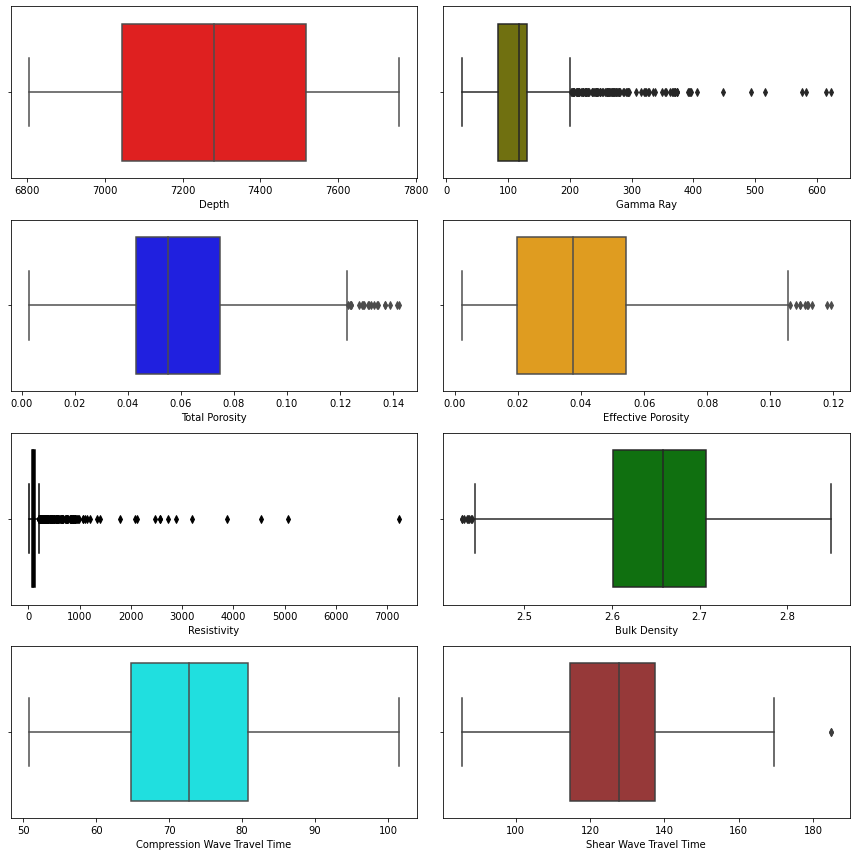

In [4]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.boxplot(x=df['Depth'] , color="red", ax=axes[0, 0])
sns.boxplot(x=df['Gamma Ray'] , color="olive", ax=axes[0, 1])
sns.boxplot(x=df['Total Porosity'] , color="blue", ax=axes[1, 0])
sns.boxplot(x=df['Effective Porosity'] , color="orange", ax=axes[1, 1])
sns.boxplot(x=df['Resistivity'] , color="black", ax=axes[2, 0])
sns.boxplot(x=df['Bulk Density'] , color="green", ax=axes[2, 1])
sns.boxplot(x=df['Compression Wave Travel Time'] , color="cyan", ax=axes[3, 0])
sns.boxplot(x=df['Shear Wave Travel Time'] , color="brown", ax=axes[3, 1])
plt.tight_layout()

<AxesSubplot:>

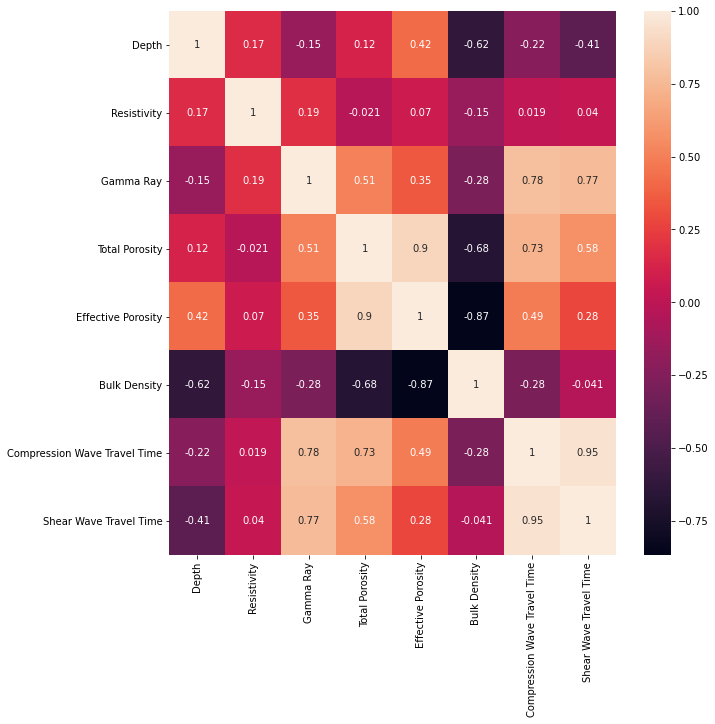

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [6]:
df=df[(df['Resistivity'] > 0) & (df['Resistivity'] < 2500)]
df=df[(df['Gamma Ray'] > 0) & (df['Gamma Ray'] < 500)]


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(df)
df_scaled = scaler.transform(df)


In [14]:
df_scaled=pd.DataFrame(df_scaled, columns=['Depth', 'Resistivity', 'Gamma Ray', 'Total Porosity','Effective Porosity', 'Bulk Density',
       'Compression Wave Travel Time', 'Shear Wave Travel Time'])

y_scaled=df_scaled[['Compression Wave Travel Time', 'Shear Wave Travel Time']]
x_scaled=df_scaled.drop(['Compression Wave Travel Time', 'Shear Wave Travel Time'], axis=1)

print(x_scaled)
print(y_scaled)

         Depth  Resistivity  Gamma Ray  Total Porosity  Effective Porosity  \
0     0.000000     0.016282   0.183631        0.209885            0.012466   
1     0.000525     0.016845   0.188899        0.229493            0.040836   
2     0.001051     0.019349   0.192196        0.237718            0.058116   
3     0.001576     0.018673   0.195560        0.203643            0.023040   
4     0.002102     0.018238   0.199009        0.191525            0.003439   
...        ...          ...        ...             ...                 ...   
1885  0.996847     0.443327   0.124222        0.048322            0.065595   
1886  0.997373     0.227071   0.094675        0.032019            0.053473   
1887  0.997898     0.260616   0.060665        0.008666            0.027596   
1888  0.999475     0.723632   0.021995        0.000000            0.023126   
1889  1.000000     1.000000   0.017891        0.039877            0.071699   

      Bulk Density  
0         0.800385  
1         0.800005  


In [15]:
seed= 1000
np.random.seed(seed)
x_train,x_test,y_train, y_test= train_test_split(x_scaled, y_scaled, test_size=0.30)

In [18]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
np.random.seed(seed)
gamma = [0.1,1,10]
c = [0.1,1,10]
for a in c:
    for b in gamma:
        SVM = MultiOutputRegressor((SVR(kernel='rbf', gamma=b,C=a)))
        SVM.fit(x_train,y_train)
        y_pred_train=SVM.predict(x_train)
        y_pred_test=SVM.predict(x_test)
        corr_train1=np.corrcoef(y_train['Compression Wave Travel Time'], y_pred_train[:,0]) [0,1]
        corr_train2=np.corrcoef(y_train['Shear Wave Travel Time'], y_pred_train[:,1]) [0,1]
        print('Gamma :' + str(b), 'C :' + str(a))

        print('Compression Wave Travel Time Train Data r^2=',round(corr_train1**2,4),'r=', round(corr_train1,4))
        print('Shear Wave Travel Time Train Data r^2=',round(corr_train2**2,4),'r=', round(corr_train2,4))



Gamma :0.1 C :0.1
Compression Wave Travel Time Train Data r^2= 0.8194 r= 0.9052
Shear Wave Travel Time Train Data r^2= 0.8064 r= 0.898
Gamma :1 C :0.1
Compression Wave Travel Time Train Data r^2= 0.9045 r= 0.9511
Shear Wave Travel Time Train Data r^2= 0.8919 r= 0.9444
Gamma :10 C :0.1
Compression Wave Travel Time Train Data r^2= 0.9347 r= 0.9668
Shear Wave Travel Time Train Data r^2= 0.9294 r= 0.964
Gamma :0.1 C :1
Compression Wave Travel Time Train Data r^2= 0.8808 r= 0.9385
Shear Wave Travel Time Train Data r^2= 0.8747 r= 0.9353
Gamma :1 C :1
Compression Wave Travel Time Train Data r^2= 0.9232 r= 0.9608
Shear Wave Travel Time Train Data r^2= 0.9067 r= 0.9522
Gamma :10 C :1
Compression Wave Travel Time Train Data r^2= 0.9496 r= 0.9745
Shear Wave Travel Time Train Data r^2= 0.939 r= 0.969
Gamma :0.1 C :10
Compression Wave Travel Time Train Data r^2= 0.9056 r= 0.9516
Shear Wave Travel Time Train Data r^2= 0.8961 r= 0.9466
Gamma :1 C :10
Compression Wave Travel Time Train Data r^2= 0.930

In [21]:
import pypandoc

In [27]:
pypandoc.convert('Assignment 12.md','docx',outputfile='Assignment 12.docx')

<ipython-input-27-bd52a74d8ace>:1: DeprecationWarning: Due to possible ambiguity, 'convert()' is deprecated. Use 'convert_file()'  or 'convert_text()'.
  pypandoc.convert('Assignment 12.md','docx',outputfile='Assignment 12.docx')


''